<a href="https://colab.research.google.com/github/PaulSerin/Big-Data-Framework/blob/main/BDF_05_RDDs__Resilient_Distributed_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#00 - Configuration of Apache Spark on Collaboratory





###Installing Java, Spark, and Findspark


---


This code installs Apache Spark 2.2.1, Java 8, and [Findspark](https://github.com/minrk/findspark), a library that makes it easy for Python to find Spark.

In [5]:
import os

os.environ["SPARK_VERSION"] = "spark-3.5.3"
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget  http://apache.osuosl.org/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!echo $SPARK_VERSION-bin-hadoop3.tgz
!rm $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
--2024-11-26 08:29:39--  http://apache.osuosl.org/spark/spark-3.5.3/sp

### Set Environment Variables
Set the locations where Spark and Java are installed.


In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark/"
os.environ["DRIVE_DATA"] = "/content/gdrive/My Drive/Big Data Framework/data/"

!rm /content/spark
!ln -s /content/$SPARK_VERSION-bin-hadoop3 /content/spark
!export PATH=$PATH:$SPARK_HOME/bin:$SPARK_HOME/sbin
!echo $SPARK_HOME
!env |grep  "DRIVE_DATA"

/content/spark/
DRIVE_DATA=/content/gdrive/My Drive/Big Data Framework/data/


### Start a SparkSession
This will start a local Spark session.

In [7]:
!python -V

import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext.getOrCreate()

# Example: shows the PySpark version
print("PySpark version {0}".format(sc.version))

# Example: parallelise an array and show the 2 first elements
sc.parallelize([2, 3, 4, 5, 6]).cache().take(2)

Python 3.10.12
PySpark version 3.5.3


[2, 3]

In [8]:
from pyspark.sql import SparkSession
# We create a SparkSession object (or we retrieve it if it is already created)
spark = SparkSession \
.builder \
.appName("My application") \
.config("spark.some.config.option", "some-value") \
.master("local[4]") \
.getOrCreate()
# We get the SparkContext
sc = spark.sparkContext

In [9]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



---


# 05 - RDDs: Resilient Distributed Datasets


-   Immutable distributed collection of objects that can be manipulated in parallel.
    - Most basic data type in Spark

-   A Spark program operates on RDDs:

    -   RDDs creation

    -   RDDs **transformation** (map, filter, etc.)

    -   **Actions** on RDDs to obtain results
    
    Similar to DataFrames, but they provide a more precise control on the partitioning and data distribution

-   Spark automatically distributes the data and parallelises the operations

## RDDs creation

Two ways:

1 -   By distributing a collection of objects (e.g., a list or set) in their driver program

In [10]:
rdd1 = sc.parallelize([1,2,3,4,5,6,7,8])
print(rdd1.collect())

import numpy as np
rdd2=sc.parallelize(np.array(range(100)))
print(rdd2.collect())

# RDDs accept lists of different types
rdd5 = sc.parallelize([1,2,"three",4])
print(rdd5.collect())

[1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[1, 2, 'three', 4]


2 -   By loading an external dataset from an input such as a file

In [11]:
quijoteRDD = sc.textFile(os.environ["DRIVE_DATA"] + "quijote.txt")

print(quijoteRDD.take(1000))

['The Project Gutenberg EBook of Don Quijote, by Miguel de Cervantes Saavedra', '', 'This eBook is for the use of anyone anywhere at no cost and with', 'almost no restrictions whatsoever.  You may copy it, give it away or', 're-use it under the terms of the Project Gutenberg License included', 'with this eBook or online at www.gutenberg.net', '', '', 'Title: Don Quijote', '', 'Author: Miguel de Cervantes Saavedra', '', 'Posting Date: April 27, 2010 [EBook #2000]', 'Release Date: December, 1999', '', 'Language: Spanish', '', '', '*** START OF THIS PROJECT GUTENBERG EBOOK DON QUIJOTE ***', '', '', '', '', 'Produced by an anonymous Project Gutenberg volunteer. Text', 'file corrections and new HTML file by Joaquin Cuenca Abela.', '', '', '', '', '', '', '', '', '', '', '', 'El ingenioso hidalgo don Quijote de la Mancha', '', '', 'TASA', '', 'Yo, Juan Gallo de Andrada, escribano de Cámara del Rey nuestro señor, de', 'los que residen en su Consejo, certifico y doy fe que, habiendo visto por'

## Partitions

Spark splits each RDD into multiple partitions, which may be computed on different nodes of the cluster

-   The default number of partitions is function of the size of the cluster or the number of file blocks (for example, HDFS blocks)

-   A different number of partitions can be defined when the RDD is created

-  They can also be modified once created  (`repartition` or `coalesce`)

-  The method `glom` shows how the partitions were created

In [12]:
rdd = sc.parallelize([1,2,3,4], 2)
print(rdd.glom().collect())
print(rdd.getNumPartitions())

[[1, 2], [3, 4]]
2


## RDDs and DataFrames

A DataFrame has an RDD underneath, that can be accessed in a simple way

In [13]:
dfFlightData2015 = (spark
    .read
    .option("inferSchema", "true")
    .option("header", "true")
    .csv(os.environ["DRIVE_DATA"] + "2015-summary.csv"))

rddFlightData2015 = dfFlightData2015.rdd

rddFlightData2015.take(10)

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Singapore', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Grenada', count=62),
 Row(DEST_COUNTRY_NAME='Costa Rica', ORIGIN_COUNTRY_NAME='United States', count=588),
 Row(DEST_COUNTRY_NAME='Senegal', ORIGIN_COUNTRY_NAME='United States', count=40),
 Row(DEST_COUNTRY_NAME='Moldova', ORIGIN_COUNTRY_NAME='United States', count=1)]

We can create a DataFrame from an RDD

In [15]:
dfNew = spark.createDataFrame(rddFlightData2015, dfFlightData2015.schema)
dfNew.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

## Transformations and Actions

### Transformations

Operations on RDDs that return a new RDD

-   Computed in a *lazy* way.

-   They typically execute a function (anonymous or not) on each of the original RDD elements.

In [16]:
quijs = quijoteRDD.filter(lambda l: "Quijote" in l)
sanchs = quijoteRDD.filter(lambda l: "Sancho" in l)
quijssancs = quijs.intersection(sanchs)
print(quijssancs.take(10))

['-Encomiéndalo tú a Dios, Sancho -respondió don Quijote-, que Él dará lo que', '-No digo yo, Sancho -replicó don Quijote-, que sea forzoso a los caballeros', '-Ya te entiendo, Sancho -le respondió don Quijote-; que bien se me trasluce', 'llegaban ijadeando; y dijo don Quijote a Sancho:', 'Quijote-. Mas yo te juro, Sancho Panza, a fe de caballero andante, que', '-Sábete, amigo Sancho -respondió don Quijote-, que la vida de los', '-¿Tan malas obras te hago, Sancho -respondió don Quijote-, que me querrías', '-No temas eso, Sancho -dijo don Quijote-, que mejor lo hará el cielo', '-En eso harás lo que debes, Sancho -dijo don Quijote-, porque, para entrar', 'movían. Pasmóse Sancho en viéndolas, y don Quijote no las tuvo todas']


### Actions

Obtain output data from RDDs

-   Return values to the driver or to the storage system

-   Force the pending transformations to be applied

In [17]:
nqs = quijssancs.count()
print("Lines with Quijote and Sancho {0}".format(nqs))
for l in quijssancs.takeSample(False,10):
    print(l)

Lines with Quijote and Sancho 350
El ventero, que vio a don Quijote atravesado en el asno, preguntó a Sancho
don Quijote, por parecerle que siempre había de hablar dél y de Sancho, sin
-Mira, Sancho -respondió don Quijote-: si el consejo que me das de que me
-Eso no -dijo a esta sazón Sancho, antes que don Quijote respondiese-. Y a
-Dáselos, Sancho -dijo don Quijote-, no para tomar el mono, sino la mona; y
don Quijote que llegasen a ella a beber un trago. Apenas oyó esto Sancho
-¿Es posible -le dijo don Quijote- que todavía, ¡oh Sancho!, pienses que
A esta sazón, dijo don Quijote, volviéndose a Sancho:
-Pues no ha de ser así, Sancho amigo -respondió don Quijote-, sino que para
de don Quijote y de la de Sancho Panza; y, confirmándose en la intención


## Common Transformations and Actions

###Element-wise transformations


Generate a new RDD from a given one by applying a function to each of the elements of the original RDD

-   `filter(func)` filters elements from an RDD

In [18]:
#As seen before
quijsRDD = quijoteRDD.filter(lambda l: "Quijote" in l)
sanchsRDD = quijoteRDD.filter(lambda l: "Sancho" in l)
quijssancsRDD = quijsRDD.intersection(sanchsRDD)
quijssancsRDD.cache()
print("Lines with Quijote and Sancho {0}".format(quijssancsRDD.count()))
for l in quijssancsRDD.takeSample(False,10):
    print(l)

Lines with Quijote and Sancho 350
-Calla, Sancho -dijo don Quijote-; que, aunque parecen aceñas, no lo son; y
-Con todo eso -dijo don Quijote-, mira, Sancho, lo que hablas, porque
-Mira, Sancho -respondió don Quijote-: si el consejo que me das de que me
Sancho fue a do estaba la bacía y la trujo; y, así como don Quijote la vio,
-Yo lo creo, Sancho -dijo don Quijote-; ve en buena hora, y Dios te guíe.
las trincheas de Sancho, y derribando no sólo a don Quijote, sino llevando
de don Quijote y de la de Sancho Panza; y, confirmándose en la intención
-Pues, ¿cómo, Sancho? -dijo don Quijote-. ¿Haste medido tú con ella?
Quijote y Sancho, con intención de buscar algún lugar donde bizmarle y
Rompió también el silencio don Quijote, diciendo a Sancho:


In [19]:
from __future__ import print_function
import unittest
# Extract the positive values from a range of numbers

#from test_helpers import Test
rdd = sc.parallelize(range(-5,5))          # Range [-5, 5)
print(rdd.collect())
filtered_rdd = rdd.filter(lambda x: x >= 0)   # Returns only the positive values


class TestNotebook(unittest.TestCase):

    def test_positive(self):
        self.assertEqual(filtered_rdd.collect(), [0, 1, 2, 3, 4])


unittest.main(argv=[''], verbosity=2, exit=False)

test_positive (__main__.TestNotebook) ... 

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]


ok

----------------------------------------------------------------------
Ran 1 test in 0.361s

OK


-   `map(func)` applies a function to each element in an RDD, with the result of the function being the new value of each element in the resulting RDD

In [20]:
# Adds 1 to each element in the RDD
# For each element, it obtains a tuple (x, x**2)
def add1(x):
    return(x+1)

squared_rdd = (filtered_rdd
               .map(add1)                 # Adds 1 to each element in the RDD
               .map(lambda x: (x, x*x)))  # For each element, it obtains a tuple (x, x**2)


class TestNotebook(unittest.TestCase):

    def test_squared(self):
        self.assertEqual(squared_rdd.collect(), [(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)])


unittest.main(argv=[''], verbosity=2, exit=False)

test_squared (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.391s

OK


-   `flatMap(func)` similar to `map`, but “flattening” the output

In [21]:
squaredflat_rdd = (filtered_rdd
                   .map(add1)
                   .flatMap(lambda x: (x, x*x)))  # returns output as a list

class TestNotebook(unittest.TestCase):

    def test_squaredflat(self):
        self.assertEqual(squaredflat_rdd.collect(), [1, 1, 2, 4, 3, 9, 4, 16, 5, 25])


unittest.main(argv=[''], verbosity=2, exit=False)


test_squaredflat (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.503s

OK


-   `sample(withReplacement, fraction, seed=None)` returns a sample of the RDD
    - `withReplacement` - if True, each element can show up several times in the sample
    - `fraction` - expected sample size as a fraction of the RDD size
        -  **without replacement**: probability of selecting an element, its value must be [0, 1]
        -  **with replacement**: expected number of times that an element will be picked up, its value must be >= 0
    - `seed` - seed for the random number generator


In [22]:
srdd1 = squaredflat_rdd.sample(False, 0.5)
srdd2 = squaredflat_rdd.sample(True, 2)
srdd3 = squaredflat_rdd.sample(False, 0.8, 14)
print('s1={0}\ns2={1}\ns3={2}'.format(srdd1.collect(), srdd2.collect(), srdd3.collect()))

s1=[1, 1, 2, 4, 4, 5, 25]
s2=[1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 3, 3, 4, 4, 16, 16, 16, 25]
s3=[1, 1, 2, 4, 3, 4, 16, 5, 25]


-   `distinct()` returns a new RDD without duplicates
    - The output order is not defined

In [23]:
distinct_rdd = squaredflat_rdd.distinct()
print(distinct_rdd.collect())

[2, 4, 16, 1, 3, 9, 5, 25]


`groupBy(func)` returns a RDD with its data grouped in a key/value format, using a function to obtain the key

In [24]:
grouped_rdd = distinct_rdd.groupBy(lambda x: x%3) #remainder of dividing by 3
print(grouped_rdd.collect())
print([(x,sorted(y)) for (x,y) in grouped_rdd.collect()])

[(2, <pyspark.resultiterable.ResultIterable object at 0x7a74a03939d0>), (0, <pyspark.resultiterable.ResultIterable object at 0x7a74a0408d60>), (1, <pyspark.resultiterable.ResultIterable object at 0x7a74a0408f40>)]
[(2, [2, 5]), (0, [3, 9]), (1, [1, 4, 16, 25])]


### Transformations on two RDDs

Set operations on two RDDs


-   `rdda.union(rddb)` returns a RDD with all the elements from the input RDDs

In [25]:
rdda = sc.parallelize(['a', 'b', 'c'])
rddb = sc.parallelize(['c', 'd', 'e'])
rddu = rdda.union(rddb)

class TestNotebook(unittest.TestCase):

    def test_rddu(self):
        self.assertEqual(rddu.collect(),['a', 'b', 'c', 'c', 'd', 'e'])


unittest.main(argv=[''], verbosity=2, exit=False)

test_rddu (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.063s

OK


- `rdda.intersection(rddb)` returns a new RDD with the elements in common in both RDDs

In [26]:
rddi = rdda.intersection(rddb)

class TestNotebook(unittest.TestCase):

    def test_rddi(self):
        self.assertEqual(rddi.collect(),['c'])


unittest.main(argv=[''], verbosity=2, exit=False)

test_rddi (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 2.169s

OK


-   `rdda.subtract(rddb)` returns a new RDD with the elements from the second RDD substracted to those from the first RDD

In [27]:
rdds = rdda.subtract(rddb)

class TestNotebook(unittest.TestCase):

    def test_rdds(self):
        self.assertEqual(rdds.collect(), ['b', 'a'])


unittest.main(argv=[''], verbosity=2, exit=False)

test_rdds (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 2.043s

OK


- `rdda.cartesian(rddb)` cartesian product of both RDDs (heavy operation)

In [28]:
rddc = rdda.cartesian(rddb)

class TestNotebook(unittest.TestCase):

    def test_rddc(self):
        self.assertEqual(rddc.collect(),[('a','c'),('a','d'),('a','e'),('b','c'),('c','c'),('b','d'),('b','e'), ('c','d'), ('c','e')])

unittest.main(argv=[''], verbosity=2, exit=False)

test_rddc (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.112s

OK


###Actions on simple RDDs


Obtain (simple or complex) elements from a RDD


#### Main aggregate actions: `reduce` and `fold`

-   `reduce(op)` combines elements from a RDD in parallel, using an operator
    - The reduction operator must be an associative-and-commutative binary operator
    - The reduction is first computed at partition level and then the intermediate values are reduced

In [30]:
rdd = sc.parallelize(range(1,10), 8)  # range [1, 10)
print(rdd.glom().collect())

# Reduction using a lambda function
p = rdd.reduce(lambda x,y: x*y) # r = 1*2*3*4*5*6*7*8*9 = 362880
print("1*2*3*4*5*6*7*8*9 = {0}".format(p))

# Reduction using a predefined operator
from operator import add
s = rdd.reduce(add) # s = 1+2+3+4+5+6+7+8+9 = 45
print("1+2+3+4+5+6+7+8+9 = {0}".format(s))

# Test with a non-commutative operator
p = rdd.reduce(lambda x,y: x-y) # r = 1-2-3-4-5-6-7-8-9 = -43
print("1-2-3-4-5-6-7-8-9 = {0}".format(p))

# It does not work with empty RDDs
#sc.parallelize([]).reduce(add)

[[1], [2], [3], [4], [5], [6], [7], [8, 9]]
1*2*3*4*5*6*7*8*9 = 362880
1+2+3+4+5+6+7+8+9 = 45
1-2-3-4-5-6-7-8-9 = -25


-   `fold(zero, op)` general version of `reduce`:
    - An initial zero value must be provided to the operator
    - The initial value must be the operator's identity value (i.e. 0 for addition; 1 for product, or an empty list for a list concatenation)
        - It works with empty RDDs
    - The `op` function must be a commutative monoid to ensure a consistent output
        - Different behaviour compared to `fold` operations of languages such as Scala
        - The operator is applied at partition level (using `zero` as initial value), and late between all partitions (using `zero` again)
        - For non-commutative operators, the output might be different from the one obtained using a sequential `fold`

In [31]:
!python -V

#addition
rdd1 = sc.parallelize([1,3,2,4,2], 2)
print(rdd1.glom().collect())
f1 = rdd1.fold(0,lambda a,b:a+b )
print(f1)


#product
rdd2 = sc.parallelize([1,3,2,4,2], 3)
print(rdd2.glom().collect())
f2 = rdd2.fold(1,lambda a,b:a*b )
print(f2)

#max
from functools import partial
from operator import itemgetter

data = sc.parallelize([('a', 1), ('b', 2),('c', 0), ('d', 3)])
zero = (None, float("-Inf"))
op = partial(max, key=itemgetter(1))

f3 = data.fold(zero,op)
print(f3)

Python 3.10.12
[[1, 3], [2, 4, 2]]
12
[[1], [3, 2], [4, 2]]
48
('d', 3)


#### Other aggregate functions: `aggregate`

 - `aggregate(zero,seqOp,combOp)`: Returns a collection by aggregating the RDD elements using two functions:
      1. `seqOp` -  partition-level aggregation: an accumulator is created by partition (initialised to `zero`); values from the partition are aggregated in the accumulator
      2. `combOp` - Aggregation between partitions: all accumulators from each partition are aggregated
      -  Both aggregations use an initial value `zero` (similar to the `fold` case).

- General version of `reduce` and `fold`    
- The first function (`seqOp`) can return a type, U, different to the T type of the RDD elements
    - `seqOp` aggregates T-type elements and returns a U-type
    - `combOp` aggregates U-type elements
    - `zero` must be of U-type

- Can return a type different from the input RDD elements.

In [32]:
# Example: compute the average of an RDD
#            (0, 0) <-- zeroValue
#
#    [1, 2]              [3, 4]
#
#    0 + 1 = 1           0 + 3 = 3  -> seqOp
#    0 + 1 = 1           0 + 1 = 1
#
#    1 + 2 = 3           3 + 4 = 7
#    1 + 1 = 2           1 + 1 = 2
#        |                   |
#        v                   v
#     (3, 2)              (7, 2)
#         \                 /
#          \               /
#           \             /
#            \           /
#             ------------
#             |  combOp  |
#             ------------
#                  |
#                  v
#               (10, 4)

seqOp = (lambda local_result, list_element: (local_result[0] + list_element, local_result[1] + 1) )
rddSeqOp = rdd.filter(seqOp)
combOp = (lambda some_local_result, another_local_result: (some_local_result[0] + another_local_result[0], some_local_result[1] + another_local_result[1]) )
sumCount = sc.parallelize([1, 2, 3, 4],2).aggregate((0, 0), seqOp, combOp)
print(sumCount)
sumCount[0] / float(sumCount[1])

(10, 4)


2.5

In [33]:
import unittest

l = [1, 2, 3, 4, 5, 6, 7, 8]
rdd = sc.parallelize(l)

# acc is a three-element tuple (List, Double, Int)
# The squared elements of RDD are concatenated in the first element of acc (list).
# The second element accumulates the RDD elements after a multiplication
# The third one stores the number of elements of the RDD
seqOp  = (lambda acc, val: (acc[0]+[val*val],
                            acc[1]*val,
                            acc[2]+1))
# For each partition, a new tuple of type acc is created
# In this operation, the three elements of the tuples are combined
combOp = (lambda acc1, acc2: (acc1[0]+acc2[0],
                              acc1[1]*acc2[1],
                              acc1[2]+acc2[2]))

a = rdd.aggregate(([], 1., 0), seqOp, combOp)

print(a)


class TestNotebook(unittest.TestCase):

    def test_a(self):

        self.assertEqual(a[1],8.*7.*6.*5.*4.*3.*2.*1.)
        self.assertEqual(a[2], len(l))

unittest.main(argv=[''], verbosity=2, exit=False)

test_a (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.014s

OK


([1, 4, 9, 16, 25, 36, 49, 64], 40320.0, 8)


#### Actions to count elements on RDDs
- `count()` returns an integer with the exact number of elements in the RDD
- `countApprox(timeout, confidence=0.95)` approximate version of `count()`, it returns a result potentially incomplete in a maximal time, even if not all tasks have finished (Experimental).
    - `timeout` is a long integer and gives the time in milliseconds
    - `confidence` probability of obtaining the the actual value. If `confidence` is 0.90 it means that, after several executions, we expect that 90% of them return the right value. Output value in [0,1]
- `countApproxDistinct(relativeSD=0.05)` returns an estimation of the number of different elements in the RDD (Experimental).
    - `relativeSD` – relative accuracy (smaller values imply a lower error, but require more memory; they must be higher than 0.000017).


In [34]:
rdd = sc.parallelize([i % 20 for i in range(10000)], 16)
print("Total number of elements: {0}".format(rdd.count()))
print("Number of different elements: {0}".format(rdd.distinct().count()))

print("Total number of elements (approx.): {0}".format(rdd.countApprox(1, 0.4)))
print("Number of different elements (approx.): {0}".format(rdd.countApproxDistinct(0.5)))

Total number of elements: 10000
Number of different elements: 20
Total number of elements (approx.): 10000
Number of different elements (approx.): 18


-   `countByValue()` returns the number of appearances of each element in the RDD as a map (or dictionary) in a key/value fashion
    - Keys are the RDD elements. Values are the number of occurrences of the associated key

In [35]:
rdd = sc.parallelize(list("abracadabra")).cache()
mymap = rdd.countByValue()

print(type(mymap))
print(mymap.items())

<class 'collections.defaultdict'>
dict_items([('a', 5), ('b', 2), ('r', 2), ('c', 1), ('d', 1)])


#### Actions to obtain values
- These methods must be used with care: if the expected result is very large the driver memory can be saturated

-   `collect()` returns a list with all the RDD elements
-   `show()` shows the elements as a table

In [36]:
mylist = rdd.collect()
print(mylist)

['a', 'b', 'r', 'a', 'c', 'a', 'd', 'a', 'b', 'r', 'a']


-   `take(n)` returns the `n` first elements of the RDD
-   `takeSample(withRep, n, [seed])` returns `n` random elements of the RDD
    - `withRep`: if True, the same element can appear several times in the sample
    - `seed`: seed for the random number generator

In [37]:
t = rdd.take(4)
print(t)
s = rdd.takeSample(False, 4)
print(s)

['a', 'b', 'r', 'a']
['r', 'c', 'a', 'a']


-   `top(n)` returns a list with the first `n` elements of the RDD sorted in descending order
-   `takeOrdered(n,[order])` returns a list with the first `n` elements of the RDD in ascending order (as opposite to `top`), or following the order indicated as a function in the optional parameter

In [38]:
rdd = sc.parallelize([8, 4, 2, 9, 3, 1, 10, 5, 6, 7]).cache()

print("4 largest elements: {0}".format(rdd.top(4)))

print("4 smallest elements: {0}".format(rdd.takeOrdered(4)))

print("4 largest elements: {0}".format(rdd.takeOrdered(4, lambda x: -x)))

4 largest elements: [10, 9, 8, 7]
4 smallest elements: [1, 2, 3, 4]
4 largest elements: [10, 9, 8, 7]


## RDDs of key/value pairs (aka *Pair RDDs*)

-   Data types heavily used on Big Data (MapReduce)

-   Spark provides special operation to handle them

### Creation of *Pair RDDs*
Key/value RDDs can be created from a list of tuples, from another RDD or from a zip of two RDDs

-   From a list of tuples

In [39]:
prdd = sc.parallelize([('a',2), ('b',5), ('a',3)])
print(prdd.collect())

prdd = sc.parallelize(zip(['a', 'b', 'c'], range(3)))
print(prdd.collect())

[('a', 2), ('b', 5), ('a', 3)]
[('a', 0), ('b', 1), ('c', 2)]


-   From another RDD

In [40]:
# Example using a file
# For each line we get a tuple, the first element being the first word of the line
# and the second one the whole line
linesrdd = sc.textFile(os.environ["DRIVE_DATA"] + "/quijote.txt", use_unicode=True)
prdd = linesrdd.map(lambda x: (x.split(" ")[0], x))

print('Pair (1st word, line): {0}\n'.format(prdd.takeSample(False, 3)))


Pair (1st word, line): [('', ''), ('', ''), ('', '   y el estar siempre ocupada,')]



In [41]:
# Using keyBy(f): Creates tuples of the RDD elements using f to obtain the key.
nrdd = sc.parallelize(range(2,5))
prdd = nrdd.keyBy(lambda x: x*x)

print(prdd.collect())

[(4, 2), (9, 3), (16, 4)]


In [42]:
# zipWithIndex(): Zips the RDD with its elements' indexes.
rdd = sc.parallelize(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], 3)
prdd = rdd.zipWithIndex()
print(rdd.glom().collect())

print(prdd.collect())

# This method starts a Spark job when the RDD has more than one partition

[['a', 'b'], ['c', 'd'], ['e', 'f', 'g', 'h']]
[('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4), ('f', 5), ('g', 6), ('h', 7)]


In [43]:
# zipWithUniqueId(): Zips the RDD with unique identifiers (long) for each element.
# Elements in the k-th partition get the k, n+k, 2*n+k,... ids, being n = number of partitions
# It does not start a Spark job
rdd = sc.parallelize(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], 3)
print("RDD partitions: {0}".format(rdd.glom().collect()))
prdd = rdd.zipWithUniqueId()

print(prdd.collect())

RDD partitions: [['a', 'b'], ['c', 'd'], ['e', 'f', 'g', 'h']]
[('a', 0), ('b', 3), ('c', 1), ('d', 4), ('e', 2), ('f', 5), ('g', 8), ('h', 11)]


- From a zip of two RDDs
    - RDDs must have the same number of partitions and the same number of elements on each partition

In [44]:
rdd1 = sc.parallelize(range(0, 5), 2)

rdd2 = sc.parallelize(range(1000, 1005), 2)

prdd = rdd1.zip(rdd2)

print(prdd.collect())

[(0, 1000), (1, 1001), (2, 1002), (3, 1003), (4, 1004)]


### Transformations on a single RDD containing key/value pairs
On a single RDD key/value we can perform key-based aggregation transformations as well as transformations affecting keys or values

#### Aggregation transformations

-   `reduceByKey(func)`/`foldByKey(func)`
    -  Return a RDD, grouping all values associated to the same key according to the `func` function
    -  Similar to `reduce` and `fold` on simple RDDs

In [45]:
from operator import add
prdd   = sc.parallelize([('a', 2), ('b', 5), ('a', 8), ('b', 6), ('b', 2)]).cache()
redrdd = prdd.reduceByKey(add)

print(redrdd.collect())

[('b', 13), ('a', 10)]


-   `groupByKey()` groups values associated to the same key
    - Operation very costly on communications
    - It is usually better to use a reduction operation


In [46]:
grouprdd = prdd.groupByKey()

print(grouprdd.collect())
print

mylist = [(k, list(v)) for k, v in grouprdd.collect()]
print(mylist)

[('b', <pyspark.resultiterable.ResultIterable object at 0x7a74d5211300>), ('a', <pyspark.resultiterable.ResultIterable object at 0x7a74a0268cd0>)]
[('b', [5, 6, 2]), ('a', [2, 8])]


- `combineByKey(createCombiner(func1), mergeValue(func2), mergeCombiners(func3))`
    - General method for key-based aggregation, similar to `aggregate`
    - It requires three functions:

     1.  `createCombiner` when going through the elements of each partition, if we find a new key, a new cummulator is created and initialised with `func1`

     2.  `mergeValue` merges values of each key in each partition using `func2`

     3.  `mergeCombiners` merges the results from the different partitions using `func3`

- The values of the output RDD can have a type different from the values of the input RDD.

In [47]:
# For each key, it obtains a tuple with the addition and the number of values
sumCount = prdd.combineByKey(
                            (lambda x: (x, 1)),
                            (lambda x, y: (x[0]+y, x[1]+1)),
                            (lambda x, y: (x[0]+y[0], x[1]+y[1])))

print(sumCount.collect())

# With this RDD, we obtain the average value for each key
m = sumCount.mapValues(lambda v: float(v[0])/v[1])
print(m.collect())

[('b', (13, 3)), ('a', (10, 2))]
[('b', 4.333333333333333), ('a', 5.0)]


#### Transformations on keys or values
-   `keys()` returns a RDD with the keys
-   `values()` returns a RDD with the values
-   `sortByKey()` returns a RDD key/value with the keys sorted


In [48]:
print("RDD complete: {0}".format(prdd.collect()))
print("RDD with the keys: {0}".format(prdd.keys().collect()))
print("RDD with the values: {0}".format(prdd.values().collect()))
print("RDD the sorted keys: {0}".format(prdd.sortByKey().collect()))

RDD complete: [('a', 2), ('b', 5), ('a', 8), ('b', 6), ('b', 2)]
RDD with the keys: ['a', 'b', 'a', 'b', 'b']
RDD with the values: [2, 5, 8, 6, 2]
RDD the sorted keys: [('a', 2), ('a', 8), ('b', 5), ('b', 6), ('b', 2)]


-   `mapValues(func)` returns a RDD applying a function on its values
-   `flatMapValues(func)` returns a RDD applying a function on its values and "flattening" the output.

In [49]:
mapv = prdd.mapValues(lambda x: (x, 10*x))
print(mapv.collect())

fmapv = prdd.flatMapValues(lambda x: (x, 10*x))
print(fmapv.collect())

[('a', (2, 20)), ('b', (5, 50)), ('a', (8, 80)), ('b', (6, 60)), ('b', (2, 20))]
[('a', 2), ('a', 20), ('b', 5), ('b', 50), ('a', 8), ('a', 80), ('b', 6), ('b', 60), ('b', 2), ('b', 20)]


### Transformations on two RDDs containing key/value pairs
Combine two RDDs of type key/value to obtain a third RDD.

- `join`/`leftOuterJoin`/`rightOuterJoin`/`fullOuterJoin` perform inner/outer/full joins on the two RDDs

In [50]:
rdd1 = sc.parallelize([("a", 2), ("b", 5), ("a", 8)]).cache()
rdd2 = sc.parallelize([("c", 7), ("a", 1)]).cache()

rdd3 = rdd1.join(rdd2)

print(rdd3.collect())

[('a', (2, 1)), ('a', (8, 1))]


In [51]:
rdd3 = rdd1.leftOuterJoin(rdd2)

print(rdd3.collect())

[('b', (5, None)), ('a', (2, 1)), ('a', (8, 1))]


In [53]:
rdd3 = rdd1.rightOuterJoin(rdd2)

print(rdd3.collect())

[('c', (None, 7)), ('a', (2, 1)), ('a', (8, 1))]


In [52]:
rdd3 = rdd1.fullOuterJoin(rdd2)

print(rdd3.collect())

[('b', (5, None)), ('c', (None, 7)), ('a', (2, 1)), ('a', (8, 1))]


-   `subtractByKey` deletes elements with a key present in another RDD

In [54]:
rdd3 = rdd1.subtractByKey(rdd2)

print(rdd3.collect())

[('b', 5)]


-   `cogroup` groups the elements that share the same key in both RDDs

In [55]:
rdd3 = rdd1.cogroup(rdd2)

print(rdd3.collect())

map = rdd3.mapValues(lambda v: [list(l) for l in v]).collectAsMap()

print(map)

[('b', (<pyspark.resultiterable.ResultIterable object at 0x7a74a0419120>, <pyspark.resultiterable.ResultIterable object at 0x7a74a0268880>)), ('c', (<pyspark.resultiterable.ResultIterable object at 0x7a74a026a170>, <pyspark.resultiterable.ResultIterable object at 0x7a74a02693c0>)), ('a', (<pyspark.resultiterable.ResultIterable object at 0x7a74a026ab00>, <pyspark.resultiterable.ResultIterable object at 0x7a74a0269d80>))]
{'b': [[5], []], 'c': [[], [7]], 'a': [[2, 8], [1]]}


### Actions on RDDs key/value
On RDDs key/value we can apply the same actions as for simple RDDs, as well as some additional ones.


-   `collectAsMap()` obtains a RDD as a map

In [58]:
prdd = sc.parallelize([("a", 7), ("b", 5), ("a", 8)]).cache()

rddMap = prdd.collectAsMap()

print(rddMap)

{'a': 8, 'b': 5}


-   `countByKey()` returns a map with the number of occurrences of each key

In [57]:
countMap = prdd.countByKey()

print(countMap)

defaultdict(<class 'int'>, {'a': 2, 'b': 3})


-   `lookup(key)` returns a list with the values associated to a given key

In [56]:
listA = prdd.lookup('a')

print(listA)

[2, 8]


##Numeric RDDs


Descriptive statistics operations provided by Spark

  Method              |  Description                       
  ------------------- | ----------------------------------
  stats()             | Statistics overview            
  mean()              | Average of the elements
  sum(), max(), min() | Total, maximum value and minimum value
  variance()          | Variance of the elements
  sampleVariance()    | Variance of the elements, computed for a sample
  stdev()             | Standard deviation
  sampleStdev()       | Sample standard deviation
  histogram()         | Histogram

In [59]:
import numpy as np

# Consider an RDD of random data with normal distribution
nrdd = sc.parallelize(np.random.normal(size=10000)).cache()

# Statistics overview
sts = nrdd.stats()

print("Statistics overview:\n {0}\n".format(sts))

Statistics overview:
 (count: 10000, mean: -0.004904589605158475, stdev: 0.9938966741930515, max: 3.591964840925373, min: -3.6406009569610225)



In [60]:
from math import fabs

# Filter outliers
stddev = sts.stdev()
avg = sts.mean()

frdd = nrdd.filter(lambda x: fabs(x - avg) < 3*stddev).cache()

print("Number of outliers: {0}".format(sts.count() - frdd.count()))

Number of outliers: 28


Text(0.5, 1.0, 'Histogram')

<Figure size 640x480 with 0 Axes>

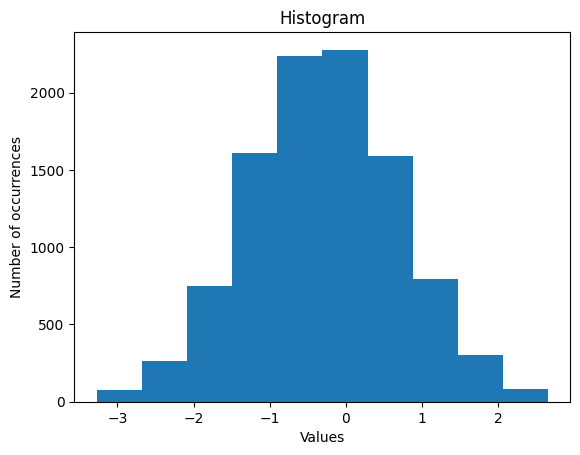

In [61]:
#import base64
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import io

def show(p):
    img = StringIO.StringIO()
    p.savefig(img, format='svg')
    img.seek(0)
    print ("%html <div style='width:600px'>" + img.buf + "</div>")

# Get a histogram with 10 groups
x,y = frdd.histogram(10)

# Clean the plot
plt.gcf().clear()
plt.figure()
plt.bar(x[:-1], y, width=0.6)
plt.xlabel(u'Values')
plt.ylabel(u'Number of occurrences')
plt.title(u'Histogram')

#show(plt)

## Reading and writing RDDs from/to files

### Supported filesystems
-   Like Hadoop, Spark supports different filesystems: local, HDFS, Amazon S3

    -   In general, it supports any data source that can be read with Hadoop

-   It can access relational or noSQL databases

    -   MySQL, Postgres, etc. using JDBC
    -   Apache Hive, HBase, Cassandra or Elasticsearch

### Supported file formats

-   Spark can access different file types:

    -   Plain text, CSV, sequence files, JSON, *protocol buffers* and *object files*
        -   It supports compressed files

### Examples with text files

In the `../yourDrive/books` directory there is a collection of compressed text files.

In [62]:
# Input files
!ls "$DRIVE_DATA"/books

pg14329.txt.gz	pg17013.txt.gz	pg2000.txt.gz	pg25807.txt.gz	pg7109.txt.gz
pg1619.txt.gz	pg17073.txt.gz	pg24536.txt.gz	pg32315.txt.gz	pg8870.txt.gz
pg16625.txt.gz	pg18005.txt.gz	pg25640.txt.gz	pg5201.txt.gz	pg9980.txt.gz


### Functions for reading and writing text files


- `sc.textFile(file/directory_name)` It creates an RDD from the lines of one or several text files
    - If a directory is specified, all files inside will be read, creating a partition per file
    - Files can be compressed, also in different formats (gz, bz2,...)
    - Wildcards can be specified in the file name
- `sc.wholeTextFiles(file/directory_name)` Reads the file and returns a key/value RDD
    - key: File absolute path
    - value: The whole text of the file
- `rdd.saveAsTextFile(output_directory)` Stores the RDD in text format in the specified directory
    - Creates a file for each partition of rdd


In [64]:
# Reads all files in the directory
# and creates an RDD with their lines
lines = sc.textFile(os.environ["DRIVE_DATA"] + "books")

# Creates a partition per input file
print("Number of partitions of the RDD lines = {0}".format(
       lines.getNumPartitions()))

Number of partitions of the RDD lines = 15


In [65]:
# Gets the words using the split method (split uses a space as default delimiter)
words = lines.flatMap(lambda x: x.split())
print("Number of partitions of the RDD words = {0}".format(
       words.getNumPartitions()))

Number of partitions of the RDD words = 15


In [66]:
# Repartitioning the RDD in 4 partitions
words2 = words.coalesce(4)
print("Number of partitions of the RDD words2 = {0}".format(
       words2.getNumPartitions()))

Number of partitions of the RDD words2 = 4


In [67]:
# Takes a random sample from the words
print(words2.takeSample(False, 10))

['ese', 'iba', 'bostezar».', 'a', 'estos', 'y', 'provincialismo,', 'que', 'tomar', 'entusiastas']


In [68]:
# Saves the RDD words as several output files
# (a file per partition)
words2.saveAsTextFile("file:///tmp/outputtxt")

In [69]:
# output files
!ls -l /tmp/outputtxt
!head /tmp/outputtxt/part-00002

total 12800
-rw-r--r-- 1 root root 2579635 Nov 26 09:16 part-00000
-rw-r--r-- 1 root root 1753383 Nov 26 09:16 part-00001
-rw-r--r-- 1 root root 2192855 Nov 26 09:16 part-00002
-rw-r--r-- 1 root root 6571159 Nov 26 09:16 part-00003
-rw-r--r-- 1 root root       0 Nov 26 09:16 _SUCCESS
The
Project
Gutenberg
EBook
of
La
Mejor
Cocinera,
by
Calleja


In [70]:
# Reads the files and returns a key/value RDD
# key->file name, value->complete file
prdd = sc.wholeTextFiles(os.environ["DRIVE_DATA"] +"books/p*.gz")
print("Number of partitions of the RDD prdd = {0}\n".format(
       prdd.getNumPartitions()))

Number of partitions of the RDD prdd = 2



In [71]:
# Gets a key/value list
# key->file name, value->number of words
mylist = prdd.mapValues(lambda x: len(x.split())).collect()

for book in mylist:
    print("The book {0:14s} has {1:6d} words".format(
           book[0].split("/")[-1], book[1]))

The book pg14329.txt.gz has 183777 words
The book pg1619.txt.gz  has 109878 words
The book pg16625.txt.gz has 170900 words
The book pg17013.txt.gz has 396086 words
The book pg17073.txt.gz has 309473 words
The book pg18005.txt.gz has  86446 words
The book pg2000.txt.gz  has 384258 words
The book pg24536.txt.gz has 134016 words
The book pg25640.txt.gz has 207338 words
The book pg25807.txt.gz has  15014 words
The book pg32315.txt.gz has  46142 words
The book pg5201.txt.gz  has  49441 words
The book pg7109.txt.gz  has  35037 words
The book pg8870.txt.gz  has  54348 words
The book pg9980.txt.gz  has  34014 words


### Sequence files
Flat files used in Hadoop consisting of binary key/value pairs

-   Their elements implement the [`Writable`](https://hadoop.apache.org/docs/stable/api/org/apache/hadoop/io/Writable.html) interface

In [72]:
rdd = sc.parallelize([("a",2), ("b",5), ("a",8)], 2)

# We save the key/value RDD as a Sequence file
rdd.saveAsSequenceFile("file:///tmp/sequenceoutdir2")

In [73]:
!echo 'output directory'
!ls -l /tmp/sequenceoutdir2
#!echo 'Attempt to read one of the files'
#!cat /tmp/sequenceoutdir2/part-00000
#!echo
!echo  'Read the file using Hadoop'
!wget https://archive.apache.org/dist/hadoop/core/hadoop-2.7.3/hadoop-2.7.3.tar.gz
!tar xf hadoop-2.7.3.tar.gz
!rm hadoop-2.7.3.tar.gz
!/content/hadoop-2.7.3/bin/hdfs dfs -text /tmp/sequenceoutdir2/part-00001

output directory
total 8
-rw-r--r-- 1 root root  99 Nov 26 09:16 part-00000
-rw-r--r-- 1 root root 113 Nov 26 09:16 part-00001
-rw-r--r-- 1 root root   0 Nov 26 09:16 _SUCCESS
Read the file using Hadoop
--2024-11-26 09:16:36--  https://archive.apache.org/dist/hadoop/core/hadoop-2.7.3/hadoop-2.7.3.tar.gz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214092195 (204M) [application/x-gzip]
Saving to: ‘hadoop-2.7.3.tar.gz’

hadoop-2.7.3.tar.gz 100%[===================>] 204.17M   507KB/s    in 6m 20s  

2024-11-26 09:22:56 (551 KB/s) - ‘hadoop-2.7.3.tar.gz’ saved [214092195/214092195]

b	5
a	8


In [74]:
# We read the file in another RDD
rdd2 = sc.sequenceFile("file:///tmp/sequenceoutdir2",
                       "org.apache.hadoop.io.Text",
                       "org.apache.hadoop.io.IntWritable")

print("Content of the RDD {0}".format(rdd2.collect()))

Content of the RDD [('b', 5), ('a', 8), ('a', 2)]


### Hadoop input/output formats
Spark can interact with any file format supported by Hadoop
- It supports the "old" and "new" APIs
- It supports accessing other storage types (not files), e.g. HBase or MongoDB, using `saveAsHadoopDataSet` and/or `saveAsNewAPIHadoopDataSet`


In [75]:
# We save the key/value RDD as a Hadoop text file (TextOutputFormat)
rdd.saveAsNewAPIHadoopFile("file:///tmp/hadoopfileoutdir",
                            "org.apache.hadoop.mapreduce.lib.output.TextOutputFormat",
                            "org.apache.hadoop.io.Text",
                            "org.apache.hadoop.io.IntWritable")


In [76]:
!echo 'Output directory'
!ls -l /tmp/hadoopfileoutdir
!cat /tmp/hadoopfileoutdir/part-r-00001

Output directory
total 8
-rw-r--r-- 1 root root 4 Nov 26 09:23 part-r-00000
-rw-r--r-- 1 root root 8 Nov 26 09:23 part-r-00001
-rw-r--r-- 1 root root 0 Nov 26 09:23 _SUCCESS
b	5
a	8


In [77]:
# We read it as a Hadoop key/value file (KeyValueTextInputFormat)
rdd3 = sc.newAPIHadoopFile("file:///tmp/hadoopfileoutdir",
                          "org.apache.hadoop.mapreduce.lib.input.KeyValueTextInputFormat",
                          "org.apache.hadoop.io.Text",
                          "org.apache.hadoop.io.IntWritable")

print("Content of the RDD {0}".format(rdd3.collect()))

Content of the RDD [('b', '5'), ('a', '8'), ('a', '2')]




---

## Exercises

### Exercise 5.1: Word count

**Using RDDs**, count the number of lines in the `$DRIVE_DATA/quijote.txt` file. Then, count the number of words in the file. Finally, count the number of *different* words in the file.


In [81]:
file_path = f"{os.environ['DRIVE_DATA']}quijote.txt"

rdd = spark.sparkContext.textFile(file_path)

rdd = rdd.filter(lambda line: line.strip() != "") # We remove empty lines

num_lines = rdd.count()

num_words = rdd.flatMap(lambda line: line.split(" ")).count()

num_distinct_words = rdd.flatMap(lambda line: line.split(" ")).distinct().count()

print(f"Number of lines: {num_lines}")
print(f"Number of words: {num_words}")
print(f"Number of different words: {num_distinct_words}")


Number of lines: 31931
Number of words: 387834
Number of different words: 40060


### Exercise 5.2: Count people by age

Using RDDs, create a barplot showing of number of people (y-axis) per age (x-axis) using the information in the $DRIVE_DATA/people.txt file



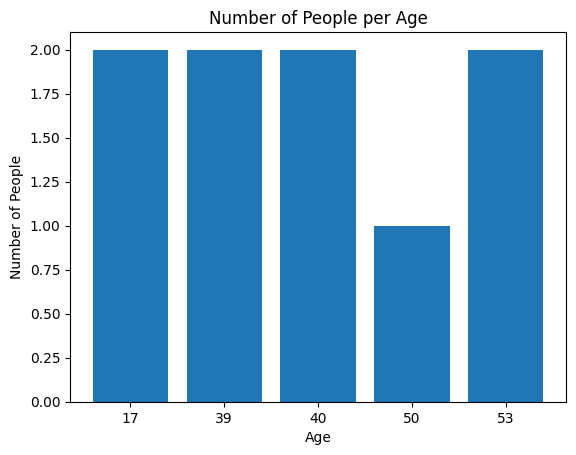

In [84]:
import matplotlib.pyplot as plt

file_path = f"{os.environ['DRIVE_DATA']}people.txt"

rdd = spark.sparkContext.textFile(file_path)

# Extract age and count occurrences
age_counts = rdd.map(lambda line: line.split("\t")[1])
age_counts = age_counts.map(lambda age: (age, 1)).reduceByKey(lambda x, y: x + y)

# Collect the results
age_counts_data = age_counts.collect()

# Sort for plotting
ages, counts = zip(*sorted(age_counts_data, key=lambda x: int(x[0])))

# Create the bar plot
plt.bar(ages, counts)
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Number of People per Age")
#plt.xticks(rotation=45)
plt.show()


### Exercise 5.3: Obtain the number of received citations

Using RDDs, write a PySpark program that obtains, from the cite75_99.txt file, the number of citations received by each patent.


In [89]:
file_path = f"{os.environ['DRIVE_DATA']}cite75_99.txt.tar.bz2"

# Load the file into an RDD
rdd = spark.sparkContext.textFile(file_path)

rdd.take(10)

# Extract cited patents and count citations
citations = rdd.map(lambda line: line.split(",")[1])  # Assuming '->' separates the citing and cited patents
citations_count = citations.map(lambda patent: (patent, 1)).reduceByKey(lambda x, y: x + y)

# Collect and display results
citations_data = citations_count.collect()
print("Number of citations received by each patent:")
for patent, count in sorted(citations_data, key=lambda x: -x[1]):
    print(f"Patent {patent}: {count} citations")


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 168.0 failed 1 times, most recent failure: Lost task 2.0 in stage 168.0 (TID 480) (af5fbe9511de executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/content/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/content/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1237, in process
    out_iter = func(split_index, iterator)
  File "/content/spark/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/content/spark/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/content/spark/python/pyspark/rdd.py", line 840, in func
    return f(iterator)
  File "/content/spark/python/pyspark/rdd.py", line 3983, in combineLocally
    merger.mergeValues(iterator)
  File "/content/spark/python/lib/pyspark.zip/pyspark/shuffle.py", line 256, in mergeValues
    for k, v in iterator:
  File "/content/spark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "<ipython-input-89-06c2011bb282>", line 9, in <lambda>
IndexError: list index out of range

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1211)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1217)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2458)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor61.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/content/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/content/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1237, in process
    out_iter = func(split_index, iterator)
  File "/content/spark/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/content/spark/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/content/spark/python/pyspark/rdd.py", line 840, in func
    return f(iterator)
  File "/content/spark/python/pyspark/rdd.py", line 3983, in combineLocally
    merger.mergeValues(iterator)
  File "/content/spark/python/lib/pyspark.zip/pyspark/shuffle.py", line 256, in mergeValues
    for k, v in iterator:
  File "/content/spark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "<ipython-input-89-06c2011bb282>", line 9, in <lambda>
IndexError: list index out of range

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1211)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1217)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [ ]:
!ls "$DRIVE_DATA"